# Mini-project: Applying supervised learning to predict student dropout

**Welcome to your Mini-project: Applying supervised learning to predict student dropout rate**

In this project, we will examine student data and use supervised learning techniques to predict whether a student will drop out. In the education sector, retaining students is vital for the institution's financial stability and for students’ academic success and personal development. A high dropout rate can lead to significant revenue loss, diminished institutional reputation, and lower overall student satisfaction.

You will work with the data in three distinct stages:

1.  Applicant and course information
2.  Student and engagement data
3.  Academic performance data

These stages reflect Study Group’s real-world data journey and how student information has progressed and become available. Additionally, this approach enables you, through data exploration, to support Study Group in better understanding and identifying key metrics to monitor. This approach will also assist you in determining at which stage of the student journey interventions would be most effective.

Please set aside approximately **12 hours** to complete the mini-project.

## Business context
Study Group specialises in providing educational services and resources to students and professionals across various fields. The company's primary focus is on enhancing learning experiences through a range of services, including online courses, tutoring, and educational consulting. By leveraging cutting-edge technology and a team of experienced educators, Study Group aims to bridge the gap between traditional learning methods and the evolving needs of today's learners.

Study Group serves its university partners by establishing strategic partnerships to enhance the universities’ global reach and diversity. It supports the universities in their efforts to attract international students, thereby enriching the cultural and academic landscape of their campuses. It works closely with university faculty and staff to ensure that the universities are prepared and equipped to welcome and support a growing international student body. Its partnership with universities also offers international students a seamless transition into their chosen academic environment.

Study Group runs several International Study Centres across the UK and Dublin in partnership with universities with the aim of preparing a pipeline of talented international students from diverse backgrounds for degree study. These centres help international students adapt to the academic, cultural, and social aspects of studying abroad. This is achieved by improving conversational and subject-specific language skills and academic readiness before students progress to a full degree programme at university.

Through its comprehensive suite of services, it supports learners and universities at every stage of their educational journey, from high school to postgraduate studies. Its approach is tailored to meet the unique needs of each learner, offering personalised learning paths and flexible scheduling options to accommodate various learning styles and commitments.

Study Group's services are designed to be accessible and affordable, making quality education a reality for many individuals. By focusing on the integration of technology and personalised learning, the company aims to empower learners to achieve their full potential and succeed in their academic and professional pursuits. Study Group is at the forefront of transforming how people learn and grow through its dedication to innovation and excellence.

Study Group has provided you with 3 data sets.


## Objective
By the end of this mini-project, you will have developed the skills and knowledge to apply advanced machine learning techniques to create a predictive model for student dropout. This project will involve comprehensive data exploration, preprocessing, and feature engineering to ensure high-quality input for the models. You will employ and compare multiple predictive algorithms, such as XGBoost, and a neural network-based model, to determine the most effective model for predicting student dropout.

In the Notebook, you will:
- explore the data sets, taking a phased approach
- preprocess the data and conduct feature engineering
- predict the dropout rate using XGBoost, and a neural network-based model.

You will also write a report summarising the results of your findings and recommendations.

## Assessment criteria
By completing this project, you’ll be able to provide evidence that you can:

- develop accurate predictions across diverse organisational scenarios by building and testing advanced ML models
- inform data-driven decision-making with advanced machine learning algorithms and models
- propose and present effective solutions to organisational problems using data preprocessing, model selection, and insightful analysis techniques.

## Project guidance
1.   Navigate to **Mini-project 6.3 Applying supervised learning to predict student dropout**, and save a copy of the activity Notebook to your Drive.

2. Please refer to the Rubric for specific steps to be performed as part of the project activity. Every step mentioned in the rubric will be assessed separately.

3. When you’ve completed the activity:
  - download your completed Notebook as an IPYNB (Jupyter Notebook) or PY (Python) file
  - save the file as follows: **LastName_FirstName_CAM_C201_Week_6_Mini-project**.

4. Prepare a detailed report (800–1,000 words) that includes an overview of your approach, a description of your analysis, and an explanation of the insights you identified - Please refer to the Rubric for further details that should form a part of your analysis and report. Save the document as a PDF named according to the following convention: **LastName_FirstName_CAM_C201_W6_Mini-project.pdf**.

5. Submit your Notebook and PDF document.




# Import Libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Import OrdinalEncoder.
#from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as sk_metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam, SGD

#import xgboost
from xgboost import XGBClassifier




# Stage 1

In [74]:
# File URL
file_url = "https://drive.google.com/uc?id=1pA8DDYmQuaLyxADCOZe1QaSQwF16q1J6"

## Data Inspection


In [75]:
# Start coding from here with Stage 1 dataset
stage1_df = pd.read_csv(file_url)
print(stage1_df.shape)
stage1_df.head()


(25059, 16)


,CentreName,LearnerCode,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,HomeState,HomeCity,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,ProgressionDegree,ProgressionUniversity
0,ISC_Aberdeen,2284932,Agent,Standard Agent Booking,NaN,13/01/1998,Male,Chinese,Jianye District; Jiangsu Province,Nanjing,Pre-Masters,Business and Law Pre-Masters,True,Yes,Msc Econ Accounting and Investment Management,University of Aberdeen
1,ISC_Aberdeen,2399500,Agent,Standard Agent Booking,NaN,12/2/1998,Male,Chinese,NaN,Xi'an,Foundation,Life Sciences Undergraduate Foundation Programme,False,Yes,BSc Biological Sciences,University of Aberdeen
2,ISC_Aberdeen,2424946,Agent,Standard Agent Booking,NaN,7/4/2000,Male,Chinese,NaN,Chengdu,International Year Two,Business Management and Finance International ...,False,Yes,MA Finance,University of Aberdeen
3,ISC_Aberdeen,2426583,Agent,Standard Agent Booking,NaN,18/05/1999,Male,Chinese,NaN,LIUYANG CITY ;CHANGSHA,International Year Two,Business Management and Finance International ...,True,Yes,MA Business Management,University of Aberdeen
4,ISC_Aberdeen,2434674,Agent,Standard Agent Booking,NaN,19/04/1996,Male,Chinese,NaN,Xiamen,Pre-Masters,Business and Law Pre-Masters,True,Yes,MSc International Business Management,University of Aberdeen


## Stage 1: Pre-processing instructions


###  Remove any columns not useful in the analysis (LearnerCode).


In [76]:
stage1_df_pre = stage1_df.drop(columns=["LearnerCode"])
stage1_df_pre.head()

,CentreName,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,HomeState,HomeCity,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,ProgressionDegree,ProgressionUniversity
0,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,13/01/1998,Male,Chinese,Jianye District; Jiangsu Province,Nanjing,Pre-Masters,Business and Law Pre-Masters,True,Yes,Msc Econ Accounting and Investment Management,University of Aberdeen
1,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,12/2/1998,Male,Chinese,NaN,Xi'an,Foundation,Life Sciences Undergraduate Foundation Programme,False,Yes,BSc Biological Sciences,University of Aberdeen
2,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,7/4/2000,Male,Chinese,NaN,Chengdu,International Year Two,Business Management and Finance International ...,False,Yes,MA Finance,University of Aberdeen
3,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,18/05/1999,Male,Chinese,NaN,LIUYANG CITY ;CHANGSHA,International Year Two,Business Management and Finance International ...,True,Yes,MA Business Management,University of Aberdeen
4,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,19/04/1996,Male,Chinese,NaN,Xiamen,Pre-Masters,Business and Law Pre-Masters,True,Yes,MSc International Business Management,University of Aberdeen


In [77]:
stage1_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   CentreName             25059 non-null  str  
 1   LearnerCode            25059 non-null  int64
 2   BookingType            25059 non-null  str  
 3   LeadSource             25059 non-null  str  
 4   DiscountType           7595 non-null   str  
 5   DateofBirth            25059 non-null  str  
 6   Gender                 25059 non-null  str  
 7   Nationality            25059 non-null  str  
 8   HomeState              8925 non-null   str  
 9   HomeCity               21611 non-null  str  
 10  CourseLevel            25059 non-null  str  
 11  CourseName             25059 non-null  str  
 12  IsFirstIntake          25059 non-null  bool 
 13  CompletedCourse        25059 non-null  str  
 14  ProgressionDegree      24184 non-null  str  
 15  ProgressionUniversity  25059 non-null  str  
dt

###  Remove columns with categorical features with high cardinality (use >200 unique values, as a guideline for this data set).


In [78]:
# Date is not categorical
stage1_cat = stage1_df_pre.drop(columns=["DateofBirth"]).columns.tolist()
print(stage1_cat)
high_cardinality=stage1_df_pre[stage1_cat].nunique(axis=0)
print(high_cardinality[high_cardinality>200])
stage1_df_pre_200 = stage1_df_pre.drop(columns=high_cardinality[high_cardinality>200].index)
stage1_df_pre_200.head()

['CentreName', 'BookingType', 'LeadSource', 'DiscountType', 'Gender', 'Nationality', 'HomeState', 'HomeCity', 'CourseLevel', 'CourseName', 'IsFirstIntake', 'CompletedCourse', 'ProgressionDegree', 'ProgressionUniversity']
HomeState            2448
HomeCity             5881
ProgressionDegree    2616
dtype: int64


,CentreName,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,ProgressionUniversity
0,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,13/01/1998,Male,Chinese,Pre-Masters,Business and Law Pre-Masters,True,Yes,University of Aberdeen
1,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,12/2/1998,Male,Chinese,Foundation,Life Sciences Undergraduate Foundation Programme,False,Yes,University of Aberdeen
2,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,7/4/2000,Male,Chinese,International Year Two,Business Management and Finance International ...,False,Yes,University of Aberdeen
3,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,18/05/1999,Male,Chinese,International Year Two,Business Management and Finance International ...,True,Yes,University of Aberdeen
4,ISC_Aberdeen,Agent,Standard Agent Booking,NaN,19/04/1996,Male,Chinese,Pre-Masters,Business and Law Pre-Masters,True,Yes,University of Aberdeen


###  Remove columns with > 50% data missing.


In [79]:
na_series = (1 - stage1_df_pre_200.count()/stage1_df_pre_200.shape[0]) > 0.5
print(na_series)
stage1_df_pre_200_na = stage1_df_pre_200.drop(columns=na_series[na_series].index)
stage1_df_pre_200_na.head()

CentreName               False
BookingType              False
LeadSource               False
DiscountType              True
DateofBirth              False
Gender                   False
Nationality              False
CourseLevel              False
CourseName               False
IsFirstIntake            False
CompletedCourse          False
ProgressionUniversity    False
dtype: bool


,CentreName,BookingType,LeadSource,DateofBirth,Gender,Nationality,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,ProgressionUniversity
0,ISC_Aberdeen,Agent,Standard Agent Booking,13/01/1998,Male,Chinese,Pre-Masters,Business and Law Pre-Masters,True,Yes,University of Aberdeen
1,ISC_Aberdeen,Agent,Standard Agent Booking,12/2/1998,Male,Chinese,Foundation,Life Sciences Undergraduate Foundation Programme,False,Yes,University of Aberdeen
2,ISC_Aberdeen,Agent,Standard Agent Booking,7/4/2000,Male,Chinese,International Year Two,Business Management and Finance International ...,False,Yes,University of Aberdeen
3,ISC_Aberdeen,Agent,Standard Agent Booking,18/05/1999,Male,Chinese,International Year Two,Business Management and Finance International ...,True,Yes,University of Aberdeen
4,ISC_Aberdeen,Agent,Standard Agent Booking,19/04/1996,Male,Chinese,Pre-Masters,Business and Law Pre-Masters,True,Yes,University of Aberdeen


###  Perform ordinal encoding for ordinal data.


In [80]:


stage1_df_pre_200_na_ord = stage1_df_pre_200_na.copy()
stage1_df_pre_200_na_ord["CourseLevel"] = stage1_df_pre_200_na["CourseLevel"].map({'Pre-Masters':4, 'Foundation':1, 'International Year Two':2,
 'International Year One':3})
stage1_df_pre_200_na_ord.head()



,CentreName,BookingType,LeadSource,DateofBirth,Gender,Nationality,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,ProgressionUniversity
0,ISC_Aberdeen,Agent,Standard Agent Booking,13/01/1998,Male,Chinese,4,Business and Law Pre-Masters,True,Yes,University of Aberdeen
1,ISC_Aberdeen,Agent,Standard Agent Booking,12/2/1998,Male,Chinese,1,Life Sciences Undergraduate Foundation Programme,False,Yes,University of Aberdeen
2,ISC_Aberdeen,Agent,Standard Agent Booking,7/4/2000,Male,Chinese,2,Business Management and Finance International ...,False,Yes,University of Aberdeen
3,ISC_Aberdeen,Agent,Standard Agent Booking,18/05/1999,Male,Chinese,2,Business Management and Finance International ...,True,Yes,University of Aberdeen
4,ISC_Aberdeen,Agent,Standard Agent Booking,19/04/1996,Male,Chinese,4,Business and Law Pre-Masters,True,Yes,University of Aberdeen


### Perform one-hot encoding for all other categorical data.

In [81]:
categoricial_feat = stage1_df_pre_200_na_ord.drop(columns=["DateofBirth","CourseLevel","CompletedCourse"]).columns
stage1_df_pre_200_na_ord_hot = pd.get_dummies(stage1_df_pre_200_na_ord,columns=categoricial_feat,drop_first=True)
stage1_df_pre_200_na_ord_hot.head()

,DateofBirth,CourseLevel,CompletedCourse,CentreName_ISC_Cardiff,CentreName_ISC_Dublin,CentreName_ISC_Durham,CentreName_ISC_Holland,CentreName_ISC_Huddersfield,CentreName_ISC_Kingston,CentreName_ISC_LJMU,...,ProgressionUniversity_University College Dublin,ProgressionUniversity_University of Aberdeen,ProgressionUniversity_University of Huddersfield,ProgressionUniversity_University of Leeds,ProgressionUniversity_University of Lincoln,ProgressionUniversity_University of Sheffield International College,ProgressionUniversity_University of Strathclyde,ProgressionUniversity_University of Surrey,ProgressionUniversity_University of Sussex,ProgressionUniversity_VU Amsterdam
0,13/01/1998,4,Yes,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,12/2/1998,1,Yes,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,7/4/2000,2,Yes,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,18/05/1999,2,Yes,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,19/04/1996,4,Yes,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


### Convert DOB to Age (y)

In [102]:

fixed_date = pd.to_datetime("02/02/2026", format='%d/%m/%Y')

stage1_df_pre_200_na_ord_hot['Age'] = (fixed_date - pd.to_datetime(stage1_df['DateofBirth'], format="%d/%m/%Y")).dt.days // 365
if 'DateofBirth' in stage1_df_pre_200_na_ord_hot.columns:
    stage1_df_pre_200_na_ord_hot.drop(columns=['DateofBirth'],inplace=True)


### Set Target Variable 

In [106]:
#Set as numpy array for ML models
target = stage1_df["CompletedCourse"].map({'Yes':1,'No':0}).to_numpy()
if 'CompletedCourse' in stage1_df_pre_200_na_ord_hot.columns:
    stage1_df_pre_200_na_ord_hot.drop(columns=['CompletedCourse'],inplace=True)


#print(target)
#print(stage1_df_pre_200_na_ord_hot.info(verbose=True))

## Check Target Variable Balance

CompletedCourse
Yes    21305
No      3754
Name: count, dtype: int64


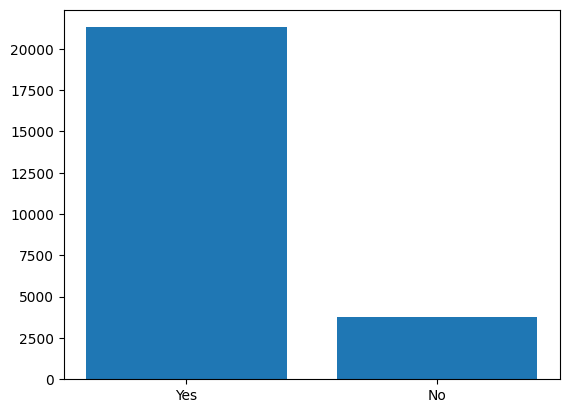

In [83]:
fig, ax = plt.subplots()

y = stage1_df["CompletedCourse"].value_counts()

print(y)
ax.bar(y.index,y)

plt.show()


### Train Test Split

We split the data into a train test split and also stratify to take into account in-balance in target.
X being our feature vector and Y being our new target.

In [98]:
X, X_test, Y, Y_test = train_test_split(stage1_df_pre_200_na_ord_hot,target,test_size=0.2,stratify=target,random_state=42)
print(f"X = {X.shape}")
print(f"Y = {Y.shape}")
print(f"X_test = {X_test.shape}")
print(f"Y_test = {Y_test.shape}")


X = (20047, 389)
Y = (20047,)
X_test = (5012, 389)
Y_test = (5012,)
<class 'pandas.DataFrame'>
Index: 18042 entries, 2165 to 11982
Columns: 389 entries, CourseLevel to Age
dtypes: bool(387), int64(2)
memory usage: 7.1 MB
None


### Train Validation Split

- xgboost can't perform validation without creating the set externally

In [ ]:

X_train, X_val, Y_train, Y_val = train_test_split(X,Y,test_size=0.10,stratify=Y,random_state=42)
print(X_train.info())
#plt.bar([1,0],[Y_train.shape[0]-np.count_nonzero(Y_train),np.count_nonzero(Y_train)])
#plt.show()

## XGBOOST Instantiation and Fit

- XGBOOST Without Hyperparameter Tuning


In [170]:

xg_clf = XGBClassifier(eval_metric='auc', objective='binary:logistic', random_state=42)
xg_clf.fit(X_train, Y_train, eval_set=[(X_val,Y_val)],verbose=False)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [171]:

Y_pred = xg_clf.predict(X_test)
Y_pred


array([1, 1, 1, ..., 1, 0, 1], shape=(5012,))

### Performance Indicators

XGBoost Accuracy: 0.8870710295291301


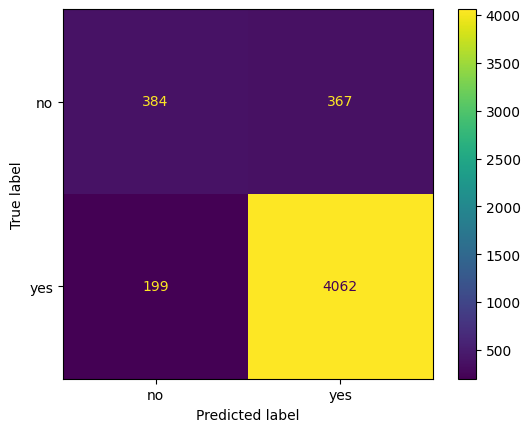

precision: 0.9171370512531045
recall: 0.9532973480403661
ROC_AUC: 0.8722759078015667


In [237]:


accuracy_score = sk_metrics.accuracy_score(y_true=Y_test,y_pred=Y_pred)
confusion_matrix = sk_metrics.confusion_matrix(y_true=Y_test,y_pred=Y_pred)
precision = sk_metrics.precision_score(y_true=Y_test,y_pred=Y_pred)
recall = sk_metrics.recall_score(y_true=Y_test,y_pred=Y_pred)
roc_auc = sk_metrics.roc_auc_score(y_true=Y_test,y_score=xg_clf.predict_proba(X_test)[:,1])

print(f"XGBoost Accuracy: {accuracy_score}")
#print(f"Confusion Matrix:\n{confusion_matrix}")
sk_metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=["no","yes"]).plot()
plt.show()
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"ROC_AUC: {roc_auc}")


- Store default xgboost metrics

In [239]:

results = {}

default_metrics = {
    "accuracy_score": accuracy_score,
    "confusion_matrix": confusion_matrix,
    "precision": precision,
    "recall": recall,
    "roc_auc": roc_auc
    }

results["default_xgboost"] = default_metrics


### XGBOOST Hyperparameter Tuning
    - learning rate = step_size (gradient decent). Ranges from 0-1,
    - max_depth = Number of levels or splits from the root node. Default is 6
    - number of estimaters = number of trees in the ensamble. Typically 100-1000 
    - should we use early-stopping-rounds ?

In [240]:
hyper_params = {
    "lr": [0.1,0.3,0.6,0.9],
    "max_d": [3,6,9,10],
    "n_est": [200,400,800,1000]
}

param_grid = ParameterGrid(hyper_params)


counter = 1
for params in param_grid:
    # tree_method='exact' default is hist
    xg_clf = XGBClassifier( eval_metric='auc', objective='binary:logistic',learning_rate=params["lr"], max_depth=params["max_d"], n_estimators=params["n_est"],random_state=42,verbosity=0)
    xg_clf.fit(X_train, Y_train, eval_set=[(X_val,Y_val)],verbose=False)
    Y_pred = xg_clf.predict(X_test)
    accuracy_score = sk_metrics.accuracy_score(y_true=Y_test,y_pred=Y_pred)
    confusion_matrix = sk_metrics.confusion_matrix(y_true=Y_test,y_pred=Y_pred)
    precision = sk_metrics.precision_score(y_true=Y_test,y_pred=Y_pred)
    recall = sk_metrics.recall_score(y_true=Y_test,y_pred=Y_pred)
    roc_auc = sk_metrics.roc_auc_score(y_true=Y_test,y_score=xg_clf.predict_proba(X_test)[:,1])
    print(f"{counter/len(param_grid)*100:.2f}% completed")
    print(f"XGBoost Accuracy for {params}: {accuracy_score}") 
    # store grid-search parameter metrics
    results[str(params)] = {
        "accuracy_score": accuracy_score,
        "confusion_matrix": confusion_matrix,
        "precision": precision,
        "recall": recall,
        "roc_auc": roc_auc,
        "model": xg_clf
    }
    counter+=1



1.56% completed
XGBoost Accuracy for {'lr': 0.1, 'max_d': 3, 'n_est': 200}: 0.8924581005586593
3.12% completed
XGBoost Accuracy for {'lr': 0.1, 'max_d': 3, 'n_est': 400}: 0.8930566640063847
4.69% completed
XGBoost Accuracy for {'lr': 0.1, 'max_d': 3, 'n_est': 800}: 0.8932561851556265
6.25% completed
XGBoost Accuracy for {'lr': 0.1, 'max_d': 3, 'n_est': 1000}: 0.8924581005586593
7.81% completed
XGBoost Accuracy for {'lr': 0.1, 'max_d': 6, 'n_est': 200}: 0.8938547486033519
9.38% completed
XGBoost Accuracy for {'lr': 0.1, 'max_d': 6, 'n_est': 400}: 0.8952513966480447
10.94% completed
XGBoost Accuracy for {'lr': 0.1, 'max_d': 6, 'n_est': 800}: 0.8950518754988028
12.50% completed
XGBoost Accuracy for {'lr': 0.1, 'max_d': 6, 'n_est': 1000}: 0.894852354349561
14.06% completed
XGBoost Accuracy for {'lr': 0.1, 'max_d': 9, 'n_est': 200}: 0.8946528332003192
15.62% completed
XGBoost Accuracy for {'lr': 0.1, 'max_d': 9, 'n_est': 400}: 0.8944533120510774
17.19% completed
XGBoost Accuracy for {'lr': 

### Maximum accurracy

In [197]:
max_acc_params = max(results, key=lambda x: results[x]["accuracy_score"])
print(f"maximum accuracy, {results[max_acc_params]["accuracy_score"]}, with params = [{max_acc_params}].")

maximum accuracy, 0.8956504389465283, with params = [{'lr': 0.3, 'max_d': 9, 'n_est': 200}].


In [232]:
### Feature Importance
frequency = results[max_acc_params]["model"].feature_importances_
feature_str = stage1_df_pre_200_na_ord_hot.columns
print(feature_str)
feature_importance = pd.Series(frequency,index=features).sort_values()
print(f"frequency shape {frequency.shape}")


Index(['CourseLevel', 'CentreName_ISC_Cardiff', 'CentreName_ISC_Dublin',
       'CentreName_ISC_Durham', 'CentreName_ISC_Holland',
       'CentreName_ISC_Huddersfield', 'CentreName_ISC_Kingston',
       'CentreName_ISC_LJMU', 'CentreName_ISC_Lancaster',
       'CentreName_ISC_Leeds',
       ...
       'ProgressionUniversity_University of Aberdeen',
       'ProgressionUniversity_University of Huddersfield',
       'ProgressionUniversity_University of Leeds',
       'ProgressionUniversity_University of Lincoln',
       'ProgressionUniversity_University of Sheffield International College',
       'ProgressionUniversity_University of Strathclyde',
       'ProgressionUniversity_University of Surrey',
       'ProgressionUniversity_University of Sussex',
       'ProgressionUniversity_VU Amsterdam', 'Age'],
      dtype='str', length=389)
frequency shape (389,)


### Display Top 1/5 of features that reduce impurity (feature_importance)

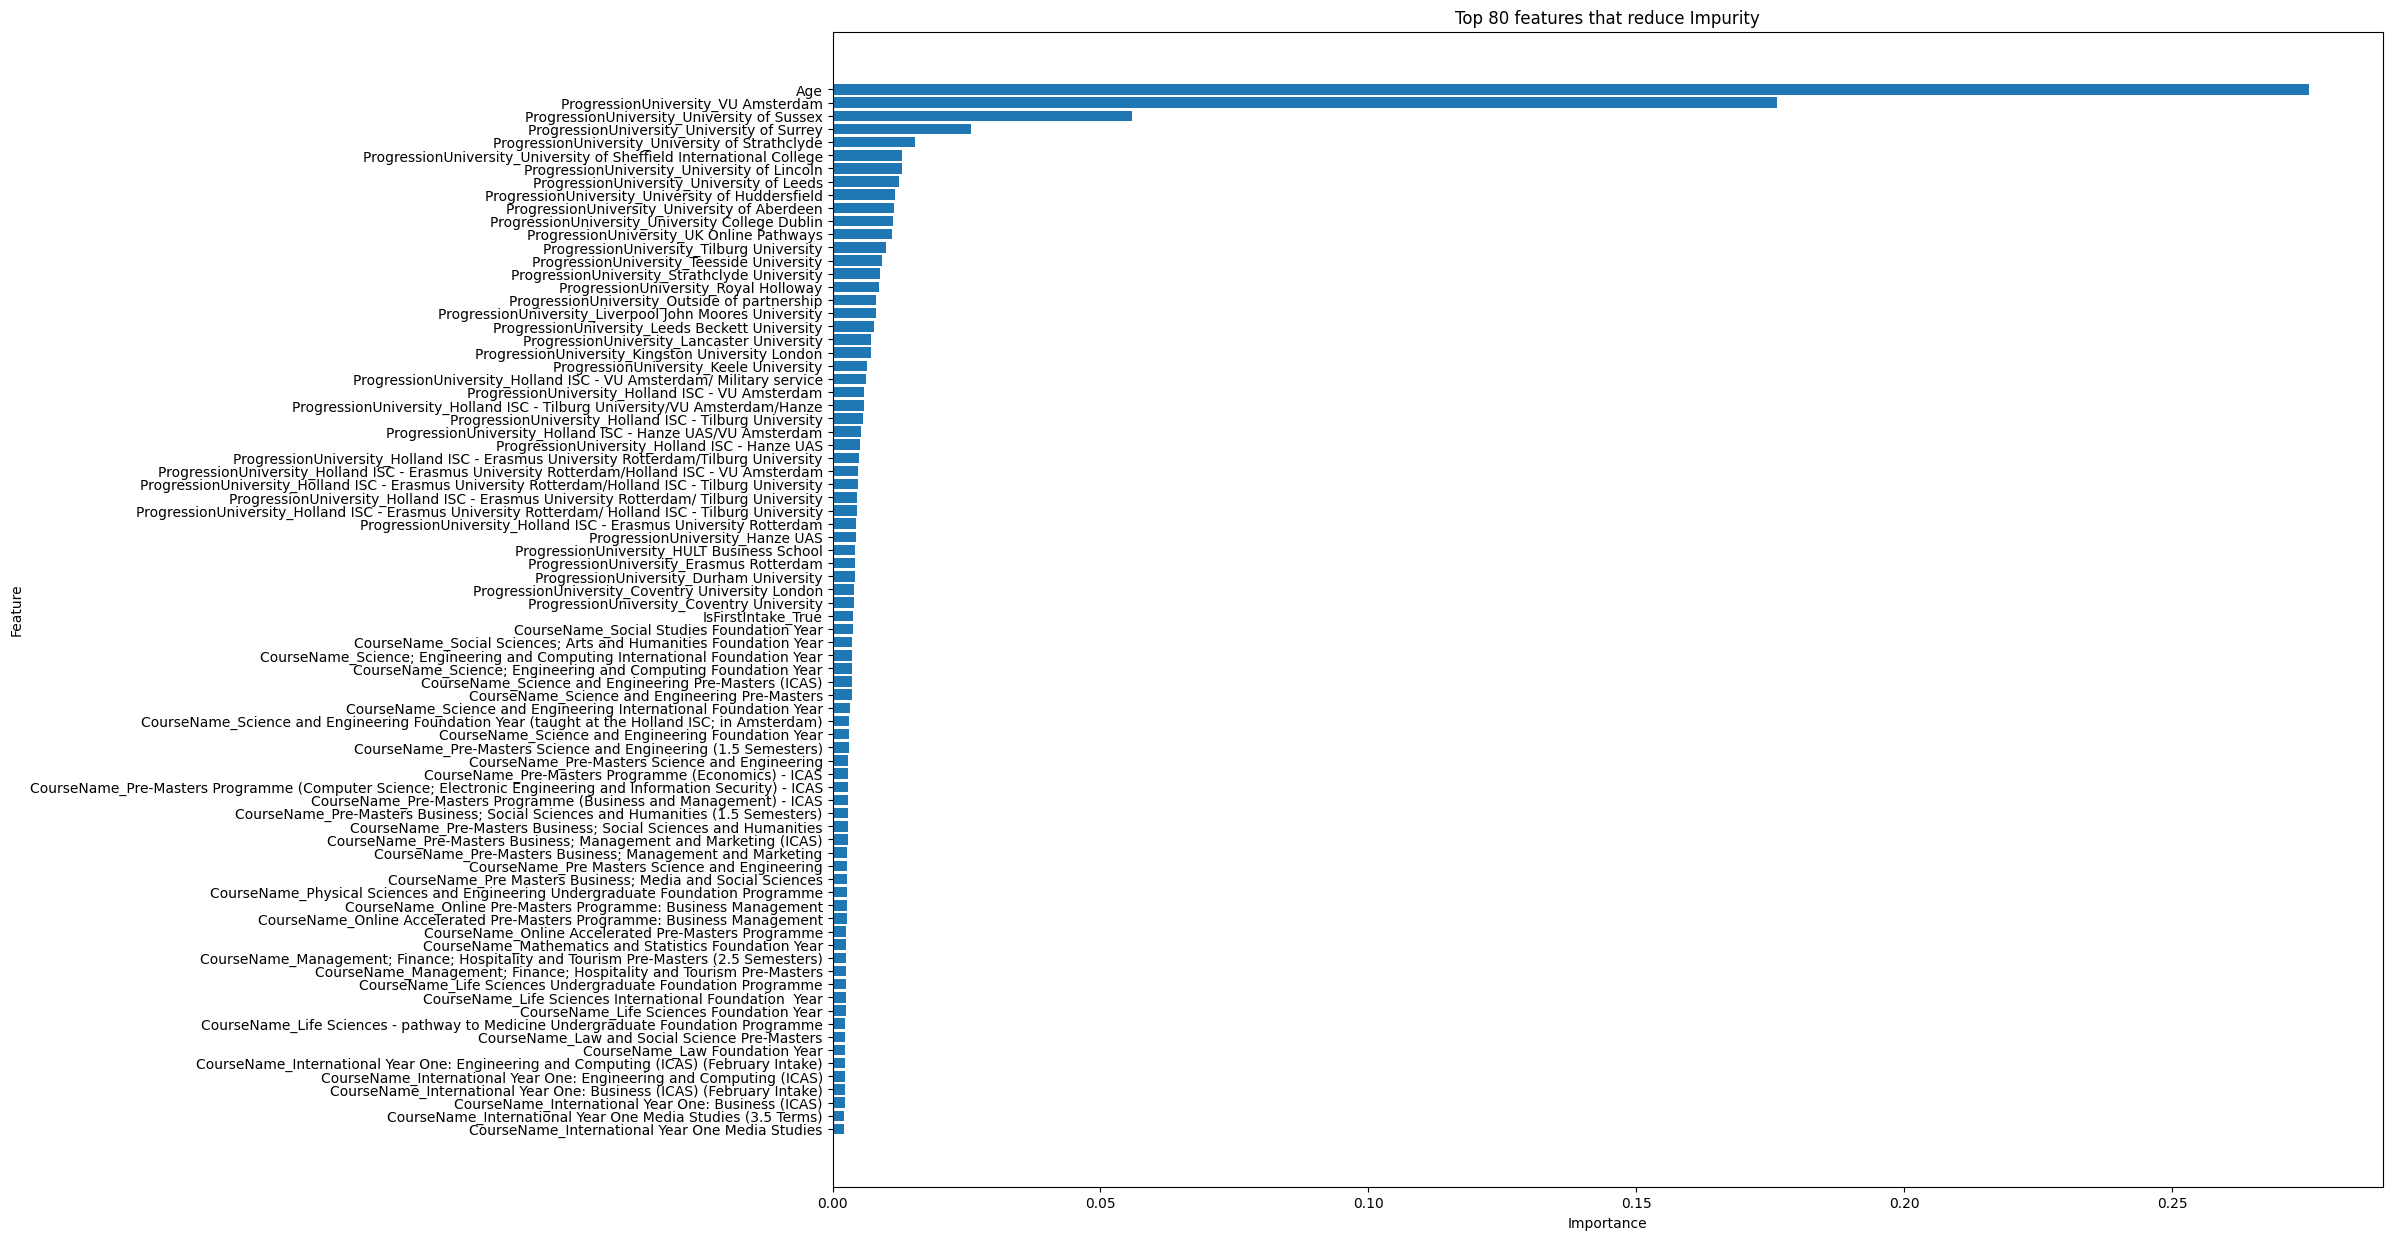

In [235]:

fig, ax = plt.subplots(figsize=(20, 15))
ax.barh(feature_str[-80:], feature_importance.iloc[-80:])
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
plt.title("Top 80 features that reduce Impurity")
plt.show()


### Feature impact using Shap

In [230]:
import shap
shap.initjs()

shap_ex = shap.TreeExplainer(results[max_acc_params]["model"])
vals = shap_ex(X_test)
vals_df = pd.DataFrame(vals.values, columns=X_test.columns, index=X_test.index)
vals_df

,CourseLevel,CentreName_ISC_Cardiff,CentreName_ISC_Dublin,CentreName_ISC_Durham,CentreName_ISC_Holland,CentreName_ISC_Huddersfield,CentreName_ISC_Kingston,CentreName_ISC_LJMU,CentreName_ISC_Lancaster,CentreName_ISC_Leeds,...,ProgressionUniversity_University of Aberdeen,ProgressionUniversity_University of Huddersfield,ProgressionUniversity_University of Leeds,ProgressionUniversity_University of Lincoln,ProgressionUniversity_University of Sheffield International College,ProgressionUniversity_University of Strathclyde,ProgressionUniversity_University of Surrey,ProgressionUniversity_University of Sussex,ProgressionUniversity_VU Amsterdam,Age
5665,-0.219652,0.000761,0.009118,-0.006485,-0.010169,0.006872,-0.004715,0.003990,-0.000022,0.002408,...,0.002037,0.0,-0.000933,0.0,0.0,-0.000423,0.0,0.0,0.0,-0.211833
2342,0.566214,0.003867,0.002996,0.254195,-0.005299,-0.009166,0.005415,0.001740,0.000060,0.001117,...,0.000704,0.0,-0.000567,0.0,0.0,-0.002316,0.0,0.0,0.0,-0.037900
6085,0.108369,0.000477,0.003877,-0.011790,-0.004271,0.375331,0.006139,0.007025,-0.000189,0.000651,...,0.002239,0.0,-0.003480,0.0,0.0,-0.002316,0.0,0.0,0.0,0.613586
8127,-0.174142,0.000031,0.023887,-0.005838,-0.005488,-0.003787,0.006056,-0.035765,-0.000025,0.001029,...,0.000632,0.0,-0.000724,0.0,0.0,-0.000423,0.0,0.0,0.0,-0.291032
4493,0.446000,0.002065,0.004381,-0.016492,-0.010408,0.075953,0.021290,0.008700,-0.000022,0.002482,...,0.000264,0.0,-0.001456,0.0,0.0,-0.000423,0.0,0.0,0.0,0.031278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24485,0.482161,0.002065,0.004381,-0.016541,-0.010409,-0.010004,0.018926,0.008715,-0.000085,0.002247,...,0.000264,0.0,-0.001614,0.0,0.0,-0.000423,0.0,0.0,0.0,-0.017137
13539,0.002101,0.000779,0.004970,-0.005492,-0.008399,-0.014772,-0.007995,0.003475,-0.000045,0.007397,...,0.001940,0.0,-0.000617,0.0,0.0,-0.000423,0.0,0.0,0.0,-0.162080
6143,-0.272952,-0.000836,0.013103,-0.048235,-0.006338,0.028032,0.032336,0.027061,-0.000008,0.000970,...,0.002037,0.0,-0.002138,0.0,0.0,-0.000423,0.0,0.0,0.0,0.562552
7362,-0.189281,0.000291,0.003111,-0.006055,-0.006268,-0.017113,-0.009591,0.003238,-0.000059,0.004765,...,0.000915,0.0,-0.000414,0.0,0.0,-0.002316,0.0,0.0,0.0,-0.172432


## Neural Network

### Scale Data for NN
- Prevents exploding gradients.

In [ ]:
scaler = StandardScaler()
nnX_train = scaler.fit_transform(X_train)
nnX_valid = scaler.fit_transform(X_val)
nnX_test = scaler.fit_transform(X_test)


### Create NN model definition 

### Train NN model definition

### Default Model compile-train pipeline

# STAGE 2

In [ ]:
# File URL
file_url = "https://drive.google.com/uc?id=1vy1JFQZva3lhMJQV69C43AB1NTM4W-DZ"

## Stage 2 Data Inspection

## Stage 2: Pre-processing instructions

### Remove any columns not useful in the analysis (LearnerCode).


### Remove columns with categorical features with high cardinality (use >200 unique values, as a guideline for this data set).

 
### Remove columns with >50% data missing.


### Perform ordinal encoding for ordinal data.


### Perform one-hot encoding for all other categorical data.


### Choose how to engage with missing values, which can be done in one of two ways for this project:
  *   Impute the rows with appropriate values.
  *   Remove rows with missing values but ONLY in cases where rows with missing values are minimal: <2% of the overall data.



In [ ]:
# Start coding from here with Stage 2 dataset

# STAGE 3

In [ ]:
# File URL
file_url = "https://drive.google.com/uc?id=18oyu-RQotQN6jaibsLBoPdqQJbj_cV2-"

## Inspect Data

###    Remove rows with missing values but ONLY in cases where rows with missing values are minimal: <2% of the overall data.

###    Impute the rows with appropriate values.

###  Choose how to engage with rows that have missing values, which can be done in one of two ways for this project:

###  Perform one-hot encoding for all other categorical data.

###  Perform ordinal encoding for ordinal data.

### Remove columns with >50% data missing.

###  Remove columns with categorical features with high cardinality (use >200 unique values, as a guideline for this data set).

###  Remove any columns not useful in the analysis (LearnerCode).

# Declaration
By submitting your project, you indicate that the work is your own and has been created with academic integrity. Refer to the **Cambridge plagiarism regulations**.


Refrences

References

- [XGBoost Tutorial](https://www.ibm.com/think/topics/xgboost#2086344952)
- [XGBoost Documentation](https://xgboost.readthedocs.io/en/release_3.2.0/)
- [XGBoost Categorical Example](https://xgboost.readthedocs.io/en/release_3.2.0/tutorials/categorical.html)
- [Bias vs Variance Tradeoff](https://xgboost.readthedocs.io/en/release_3.2.0/tutorials/param_tuning.html)
